# Tensorflow를 이용한 CNN 구성

## 1. 간단한 Convolution layer 구성

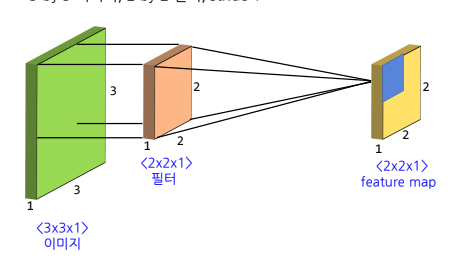

### (1) 필요한 라이브러리 import
- 배열생성을 위한 numpy
- 시각화를위한 matplolib 

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### (2) numpy array를 활용한 image 생성
- 3 by 3 3차원 tensor, Channel은 1개, 하나의 색상만 표현
- 이미지의 개수도 1개 
- Jupyter notebook같은 인터렉티브 파이썬 환경에서의 이용편의성을 위해 InteractiveSession 클래스, Tensor.eval(), Operation.run() 메서드 사용. Session 내에서 변수 계속 유지할 필요 없다.

image.shape (1, 3, 3, 1)


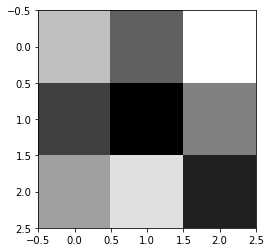

In [ ]:
image = np.array([[[[7],[4],[9]],
                   [[3],[1],[5]], 
                   [[6],[8],[2]]]], dtype=np.float32)
print("image.shape", image.shape)
plt.imshow(image.reshape(3,3), cmap='gray')
# matplotlib에서 제공하는 gray색의 컬러맵으로 이미지 보여줌
# 주어진 데이터에 따라 image color로 구분, 높은 값일 수록 밝은 색을 냄

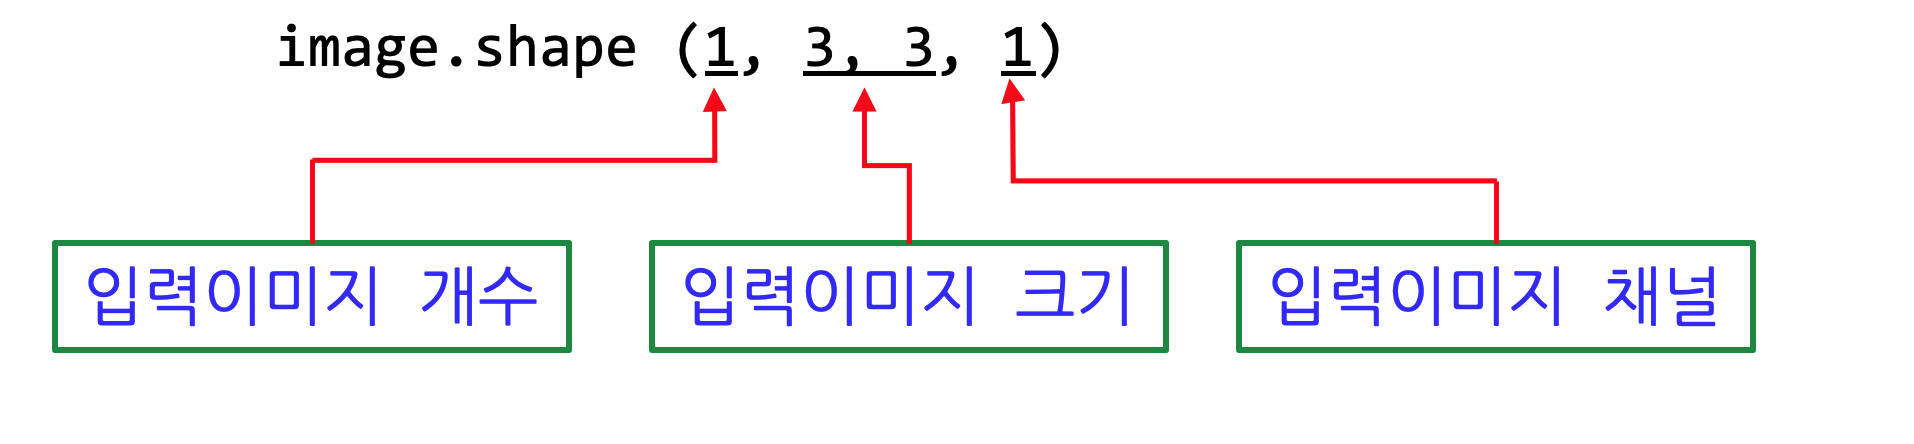

### (3) 필터 설정
- 필터크기와 개수는 상관없으나 채널은 같게 해야한다

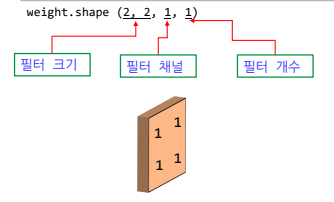

In [ ]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print(weight)
print("weight.shape", weight.shape)

tf.Tensor(
[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]], shape=(2, 2, 1, 1), dtype=float32)
weight.shape (2, 2, 1, 1)


### (4) convolution operation

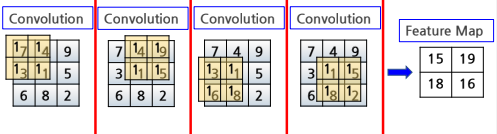

- strides=[1,1,1,1] : 각 차원마다 1씩 움직임
               [batch, height, width, channel]
- padding=‘VALID’ : 패딩없이 operation

In [ ]:
conv2d_img = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
print(conv2d_img)
print("conv2d_img.shape", conv2d_img.shape)

tf.Tensor(
[[[[15.]
   [19.]]

  [[18.]
   [16.]]]], shape=(1, 2, 2, 1), dtype=float32)
conv2d_img.shape (1, 2, 2, 1)


0
tf.Tensor(
[[[15.]
  [19.]]

 [[18.]
  [16.]]], shape=(2, 2, 1), dtype=float32)
[[15. 19.]
 [18. 16.]]


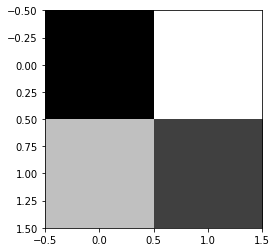

In [ ]:
for i, one_img in enumerate(conv2d_img):
    print(i)
    print(one_img)
    print(one_img.numpy().reshape(2,2)) # image로 표시하기위해 2차원으로 변환
    plt.imshow(one_img.numpy().reshape(2,2), cmap='gray')

### (5) padding 추가
- padding = same은 입력data와 출력data의 크기가 같게 padding함

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[15. 19. 14.]
 [18. 16.  7.]
 [14. 10.  2.]]


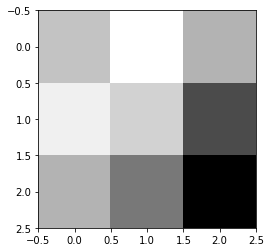

In [ ]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d_img = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("image.shape", image.shape)
print("weight.shape", weight.shape)
print("conv2d_img.shape", conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
    print(one_img.numpy().reshape(3,3))
    plt.imshow(one_img.numpy().reshape(3,3), cmap='gray')

### (6) 2개의 Filter
- 필터의 개수가 2개이므로 출력 feature map도 2개

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 2)
conv2d_img.shape (1, 3, 3, 2)
[[15. 19. 14.]
 [18. 16.  7.]
 [14. 10.  2.]]
[[-15. -19. -14.]
 [-18. -16.  -7.]
 [-14. -10.  -2.]]


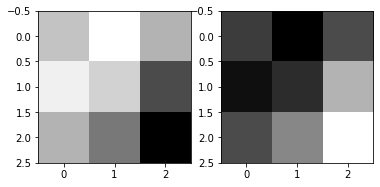

In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,-1.]],[[1.,-1.]]],
                      [[[1.,-1.]],[[1.,-1.]]]])
print("weight.shape", weight.shape)
conv2d_img = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img2 = np.swapaxes(conv2d_img, 0, 3) # image 출력하기 위한 축변경
for i, one_img in enumerate(conv2d_img2):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), 
    plt.imshow(one_img.reshape(3,3), cmap='gray')

## 2. Pooling Layer

### (1) max pooling
- 2 by 2 크기의 윈도우를 움직이면서 max값 추출

```
[[15. 19. 14.]
 [18. 16.  7.]
 [14. 10.  2.]]
[[-15. -19. -14.]
 [-18. -16.  -7.]
 [-14. -10.  -2.]]
 ```

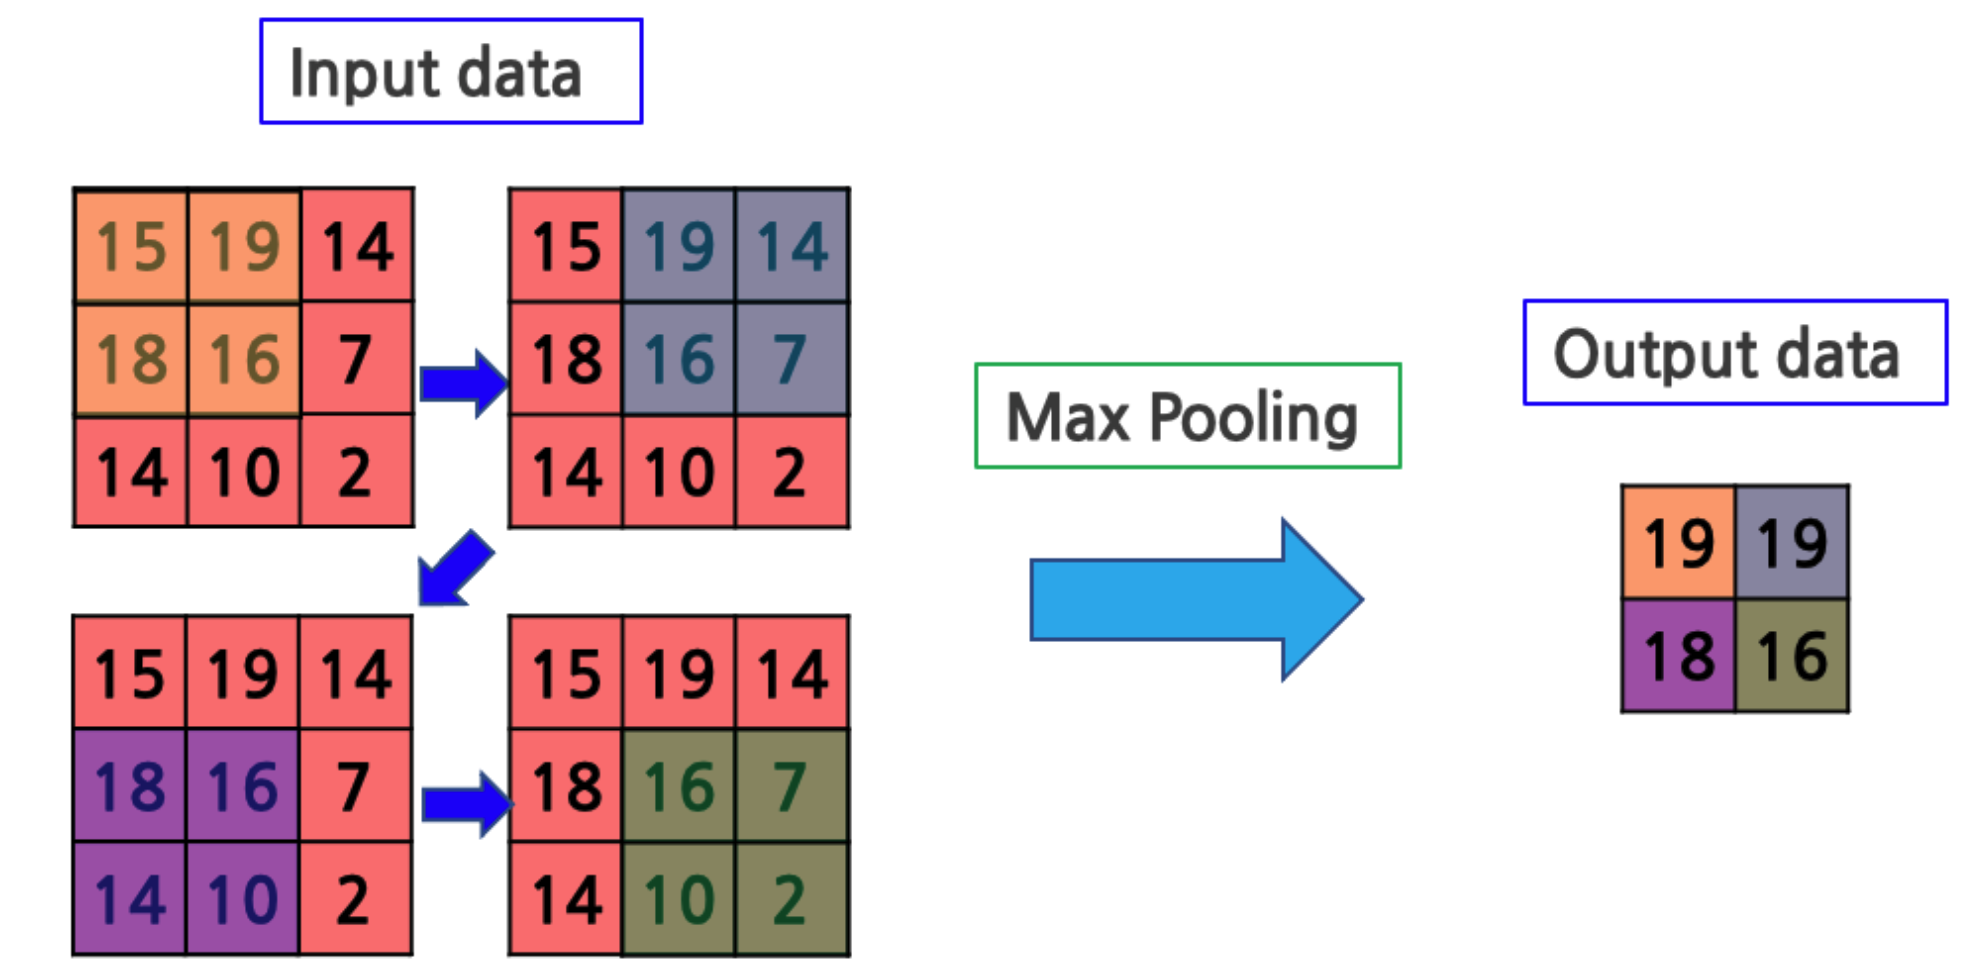

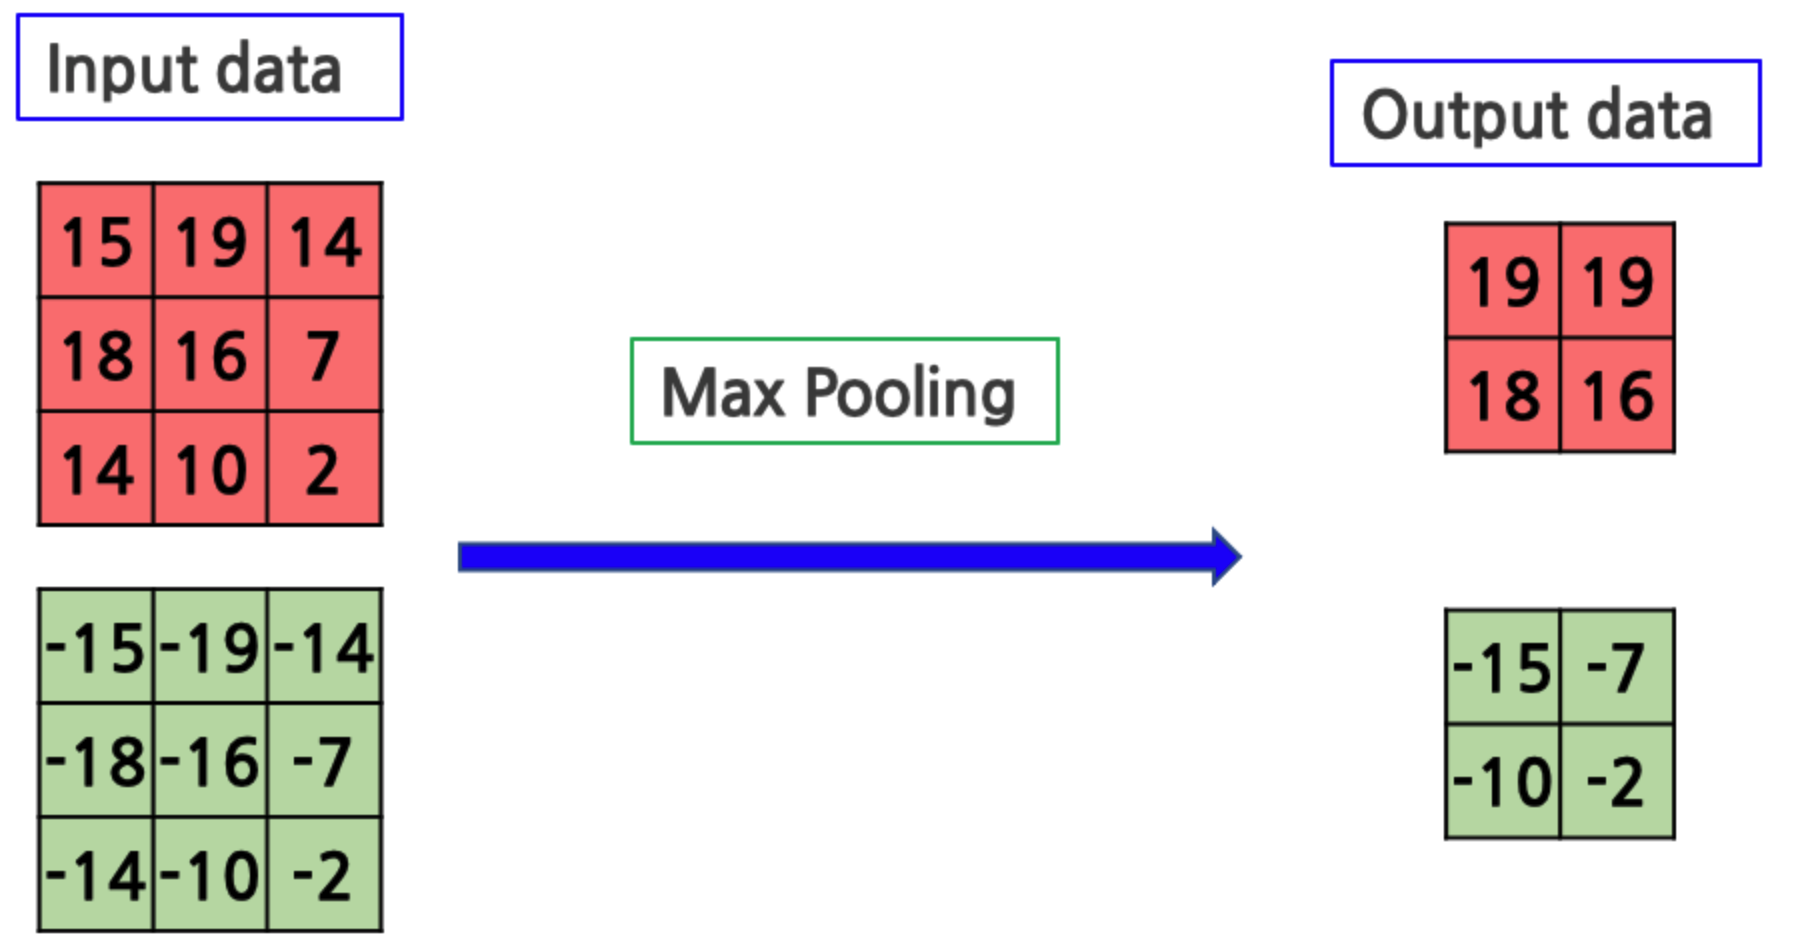

pooling_image.shape (1, 2, 2, 2)
[[19. 19.]
 [18. 16.]]
[[-15.  -7.]
 [-10.  -2.]]


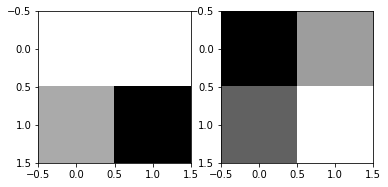

In [ ]:
pool_img = tf.nn.max_pool(conv2d_img, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')

print("pooling_image.shape", pool_img.shape)
pool_p = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_p):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

weight.shape (2, 2, 1, 1)
image.shape (1, 3, 3, 1)
conv2d_img.shape (1, 3, 3, 1)
[[15. 19. 14.]
 [18. 16.  7.]
 [14. 10.  2.]]


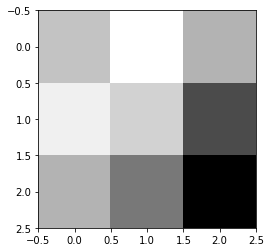

In [ ]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d_img = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("weight.shape", weight.shape)
print("image.shape", image.shape)
print("conv2d_img.shape", conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
    print(one_img.numpy().reshape(3,3))
    plt.imshow(one_img.numpy().reshape(3,3), cmap='gray')


tf.Tensor(
[[[[15.]
   [19.]
   [14.]]

  [[18.]
   [16.]
   [ 7.]]

  [[14.]
   [10.]
   [ 2.]]]], shape=(1, 3, 3, 1), dtype=float32)
[[15. 19. 14.]
 [18. 16.  7.]
 [14. 10.  2.]]


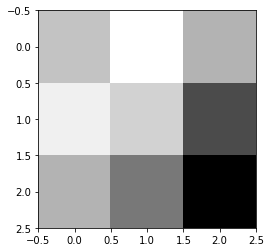

In [ ]:
L2_img = tf.nn.relu(conv2d_img)
print(L2_img)
for i, one_img in enumerate(L2_img):
    print(one_img.numpy().reshape(3,3))
    plt.imshow(one_img.numpy().reshape(3,3), cmap='gray')

# CNN을 이용한 손글씨 인식(MNIST)


### 1.전체 학습코드 (learning_rate: 0.001)

In [5]:
import tensorflow as tf
import random
import datetime

learning_rate = 0.001
training_cnt = 10
batch_size = 100
rate = 0.3

tf.random.set_seed(777)

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data() # mnist data load

y_train, y_test = tf.one_hot(y_train,10), tf.one_hot(y_test,10) 

x_train = x_train.astype(dtype='float32')
x_test = x_test.astype(dtype='float32')

x_train = tf.reshape(x_train, [-1, 28, 28, 1])  
x_test = tf.reshape(x_test, [-1, 28, 28, 1]) 

initializer = tf.initializers.GlorotUniform()

W1 = tf.Variable(tf.random.normal([3, 3, 1, 32], stddev=0.01))
b1 = tf.Variable(tf.random.normal([32], stddev=0.01))

W2 = tf.Variable(tf.random.normal([3, 3, 32, 32], stddev=0.01))
b2 = tf.Variable(tf.random.normal([32], stddev=0.01))

W3 = tf.Variable(tf.random.normal([3, 3, 32, 32], stddev=0.01))
b3 = tf.Variable(tf.random.normal([32], stddev=0.01))

W4 = tf.Variable(initializer(shape=(4 * 4 * 32, 32)))
b4 = tf.Variable(tf.random.normal([32]))

W5 = tf.Variable(initializer(shape=(32, 10)))
b5 = tf.Variable(tf.random.normal([10]))

opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

start_time = datetime.datetime.now();
print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'),'학습을시작합니다!')

for epoch in range(training_cnt):
  total_batch = int(len(x_train) / batch_size)
  avg_cost = 0
  correct_prediction = []
  for i in range(total_batch): 
    start = batch_size * i
    end = batch_size*(1+i)
    batch_xs, batch_ys = x_train[start:end], y_train[start:end]
    with tf.GradientTape() as tape:
      # Layer1
      L1 = tf.nn.conv2d(batch_xs, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
      L1 = tf.nn.relu(L1)
      L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      L1 = tf.nn.dropout(L1, rate=rate)
      #Layer2
      L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
      L2 = tf.nn.relu(L2)
      L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      L2 = tf.nn.dropout(L2, rate=rate)
      #Layer3
      L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
      L3 = tf.nn.relu(L3)
      L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      L3 = tf.nn.dropout(L3, rate=rate)
      L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])
      #Layer4
      L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
      L4 = tf.nn.dropout(L4, rate=rate)
      logits = tf.matmul(L4, W5) + b5
      cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=batch_ys))
    weight_list = [W1,W2,W3,W4,W5,b1,b2,b3,b4,b5]
    grads = tape.gradient(cost, weight_list)
    opt.apply_gradients(zip(grads, weight_list))
    pred = tf.nn.softmax(logits)
    prediction = tf.argmax(pred, 1)
    avg_cost += cost.numpy()/total_batch
    correct_prediction = tf.concat([correct_prediction,prediction],0)
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'), '학습완료!')
print('총학습시간 : ', datetime.datetime.now() - start_time )

true_Y = tf.argmax(y_train, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_prediction, true_Y), dtype=tf.float32))
print('dropout포함 Accuracy(train):','{:.3f}'.format(accuracy)) # train set에 대한 accuracy

12-10-2022 05:02:52 학습을시작합니다!
Epoch: 0001 cost = 0.539436610
Epoch: 0002 cost = 0.205225202
Epoch: 0003 cost = 0.172661418
Epoch: 0004 cost = 0.153398664
Epoch: 0005 cost = 0.138169328
Epoch: 0006 cost = 0.131206299
Epoch: 0007 cost = 0.125886769
Epoch: 0008 cost = 0.119664008
Epoch: 0009 cost = 0.120143496
Epoch: 0010 cost = 0.110847243
12-10-2022 05:04:22 학습완료!
총학습시간 :  0:01:30.247781
dropout포함 Accuracy(train): 0.968


#### (1) train 데이터 accracy
- 학습데이터에 대한 accuracy 측정을 위해 dropout 제거

In [6]:
batch_size = 30000
correct_prediction = []
for i in range(2):
    start = batch_size * i
    end = batch_size*(1+i)
    batch_xs = x_train[start:end]

    L1 = tf.nn.conv2d(batch_xs, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        #Layer2
    L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        #Layer3
    L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
    L3 = tf.nn.relu(L3)
    L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])
        #Layer4
    L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
    logits = tf.matmul(L4, W5) + b5
    pred = tf.nn.softmax(logits)
    
    prediction = tf.argmax(pred, 1)
    correct_prediction = tf.concat([correct_prediction,prediction],0)
    
true_Y = tf.argmax(y_train, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_prediction, true_Y), dtype=tf.float32))

print('dropout제외 Accuracy(train):','{:.3f}'.format(accuracy)) # test set에 대한 accuracy

r = random.randint(0, len(x_train) - 1)
print("Label: ", tf.argmax(y_train[r:r + 10], 1).numpy())
print("Prediction: ", correct_prediction[r:r+10].numpy())

dropout제외 Accuracy(train): 0.991
Label:  [3 3 4 1 5 4 7 6 8 5]
Prediction:  [3 3 4 1 5 4 7 6 8 5]


### 2.테스트데이터셋 검증

In [7]:
# test dataset에 대해서는 dropout을 적용하지 않기 때문에 layer를 다시 정의
# Layer1
L1 = tf.nn.conv2d(x_test, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#Layer2
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#Layer3
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])
#Layer4
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
logits = tf.matmul(L4, W5) + b5
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_test))
pred = tf.nn.softmax(logits)
correct_prediction = tf.argmax(pred, 1)
true_Y = tf.argmax(y_test, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_prediction, true_Y), dtype=tf.float32))

print('Accuracy(test):','{:.3f}'.format(accuracy)) # test set에 대한 accuracy

r = random.randint(0, len(x_test) - 1)
print("Label: ", tf.argmax(y_test[r:r + 10], 1).numpy())
print("Prediction: ", correct_prediction[r:r+10].numpy())

Accuracy(test): 0.990
Label:  [2 9 1 6 0 1 1 8 7 7]
Prediction:  [2 9 1 6 0 1 1 8 7 7]


### 2.전체학습코드 (learning_rate: 0.005)

In [9]:
import tensorflow as tf
import random
import datetime

learning_rate = 0.005
training_cnt = 10
batch_size = 100
rate = 0.3

tf.random.set_seed(777)

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data() # mnist data load

y_train, y_test = tf.one_hot(y_train,10), tf.one_hot(y_test,10) 

x_train = x_train.astype(dtype='float32')
x_test = x_test.astype(dtype='float32')

x_train = tf.reshape(x_train, [-1, 28, 28, 1])  
x_test = tf.reshape(x_test, [-1, 28, 28, 1]) 

initializer = tf.initializers.GlorotUniform()

W1 = tf.Variable(tf.random.normal([3, 3, 1, 32], stddev=0.01))
b1 = tf.Variable(tf.random.normal([32], stddev=0.01))

W2 = tf.Variable(tf.random.normal([3, 3, 32, 32], stddev=0.01))
b2 = tf.Variable(tf.random.normal([32], stddev=0.01))

W3 = tf.Variable(tf.random.normal([3, 3, 32, 32], stddev=0.01))
b3 = tf.Variable(tf.random.normal([32], stddev=0.01))

W4 = tf.Variable(initializer(shape=(4 * 4 * 32, 32)))
b4 = tf.Variable(tf.random.normal([32]))

W5 = tf.Variable(initializer(shape=(32, 10)))
b5 = tf.Variable(tf.random.normal([10]))

opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

start_time = datetime.datetime.now();
print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'),'학습을시작합니다!')

for epoch in range(training_cnt):
  total_batch = int(len(x_train) / batch_size)
  avg_cost = 0
  correct_prediction = []
  for i in range(total_batch): 
    start = batch_size * i
    end = batch_size*(1+i)
    batch_xs, batch_ys = x_train[start:end], y_train[start:end]
    with tf.GradientTape() as tape:
      # Layer1
      L1 = tf.nn.conv2d(batch_xs, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
      L1 = tf.nn.relu(L1)
      L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      L1 = tf.nn.dropout(L1, rate=rate)
      #Layer2
      L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
      L2 = tf.nn.relu(L2)
      L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      L2 = tf.nn.dropout(L2, rate=rate)
      #Layer3
      L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
      L3 = tf.nn.relu(L3)
      L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      L3 = tf.nn.dropout(L3, rate=rate)
      L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])
      #Layer4
      L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
      L4 = tf.nn.dropout(L4, rate=rate)
      logits = tf.matmul(L4, W5) + b5
      cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=batch_ys))
    weight_list = [W1,W2,W3,W4,W5,b1,b2,b3,b4,b5]
    grads = tape.gradient(cost, weight_list)
    opt.apply_gradients(zip(grads, weight_list))
    pred = tf.nn.softmax(logits)
    prediction = tf.argmax(pred, 1)
    avg_cost += cost.numpy()/total_batch
    correct_prediction = tf.concat([correct_prediction,prediction],0)
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'), '학습완료!')
print('총학습시간 : ', datetime.datetime.now() - start_time )

true_Y = tf.argmax(y_train, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_prediction, true_Y), dtype=tf.float32))
print('dropout포함 Accuracy(train):','{:.3f}'.format(accuracy)) # train set에 대한 accuracy

12-10-2022 05:32:00 학습을시작합니다!
Epoch: 0001 cost = 0.739500871
Epoch: 0002 cost = 0.475711980
Epoch: 0003 cost = 0.427180184
Epoch: 0004 cost = 0.408003903
Epoch: 0005 cost = 0.399378526
Epoch: 0006 cost = 0.398306401
Epoch: 0007 cost = 0.397785444
Epoch: 0008 cost = 0.391734738
Epoch: 0009 cost = 0.375898922
Epoch: 0010 cost = 0.380895110
12-10-2022 05:33:30 학습완료!
총학습시간 :  0:01:29.988877
dropout포함 Accuracy(train): 0.885


#### (1) train 데이터 accracy
- 학습데이터에 대한 accuracy 측정을 위해 dropout 제거

In [10]:
batch_size = 30000
correct_prediction = []
for i in range(2):
    start = batch_size * i
    end = batch_size*(1+i)
    batch_xs = x_train[start:end]

    L1 = tf.nn.conv2d(batch_xs, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        #Layer2
    L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        #Layer3
    L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
    L3 = tf.nn.relu(L3)
    L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])
        #Layer4
    L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
    logits = tf.matmul(L4, W5) + b5
    pred = tf.nn.softmax(logits)
    
    prediction = tf.argmax(pred, 1)
    correct_prediction = tf.concat([correct_prediction,prediction],0)
    
true_Y = tf.argmax(y_train, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_prediction, true_Y), dtype=tf.float32))

print('dropout제외 Accuracy(train):','{:.3f}'.format(accuracy)) # test set에 대한 accuracy

r = random.randint(0, len(x_train) - 1)
print("Label: ", tf.argmax(y_train[r:r + 10], 1).numpy())
print("Prediction: ", correct_prediction[r:r+10].numpy())

dropout제외 Accuracy(train): 0.965
Label:  [1 6 4 9 1 8 9 3 5 2]
Prediction:  [1 6 4 9 1 8 9 3 5 2]


### 2.테스트데이터셋 검증

In [11]:
# test dataset에 대해서는 dropout을 적용하지 않기 때문에 layer를 다시 정의
# Layer1
L1 = tf.nn.conv2d(x_test, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#Layer2
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#Layer3
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])
#Layer4
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
logits = tf.matmul(L4, W5) + b5
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_test))
pred = tf.nn.softmax(logits)
correct_prediction = tf.argmax(pred, 1)
true_Y = tf.argmax(y_test, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_prediction, true_Y), dtype=tf.float32))

print('Accuracy(test):','{:.3f}'.format(accuracy)) # test set에 대한 accuracy

r = random.randint(0, len(x_test) - 1)
print("Label: ", tf.argmax(y_test[r:r + 10], 1).numpy())
print("Prediction: ", correct_prediction[r:r+10].numpy())

Accuracy(test): 0.968
Label:  [3 4 4 3 8 9 2 3 9 7]
Prediction:  [3 4 4 3 8 9 2 3 9 7]


### 3. 학습과정 설명


#### 파라메터 값 설정
- learning_rate: weight가 발산되지 않도록 조정하는 값으로 값이 너무 작으면 train이 되지 않을 수 있고, 너무 크면 over shooting이 발생할 수 있다
- training_cnt: 전체 데이터셋에 대한 학습 반복 횟수(Epoch)
- batch_size: 한번에 학습할 데이터 수 
- rate: dropout에서 유지할 노드 수

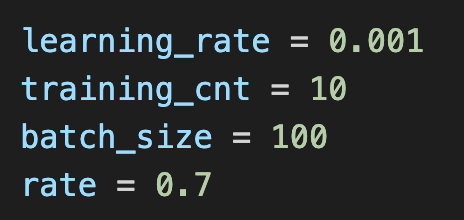

#### input data 
- 가져온 정보를 이미지화 하기 위하여 reshape

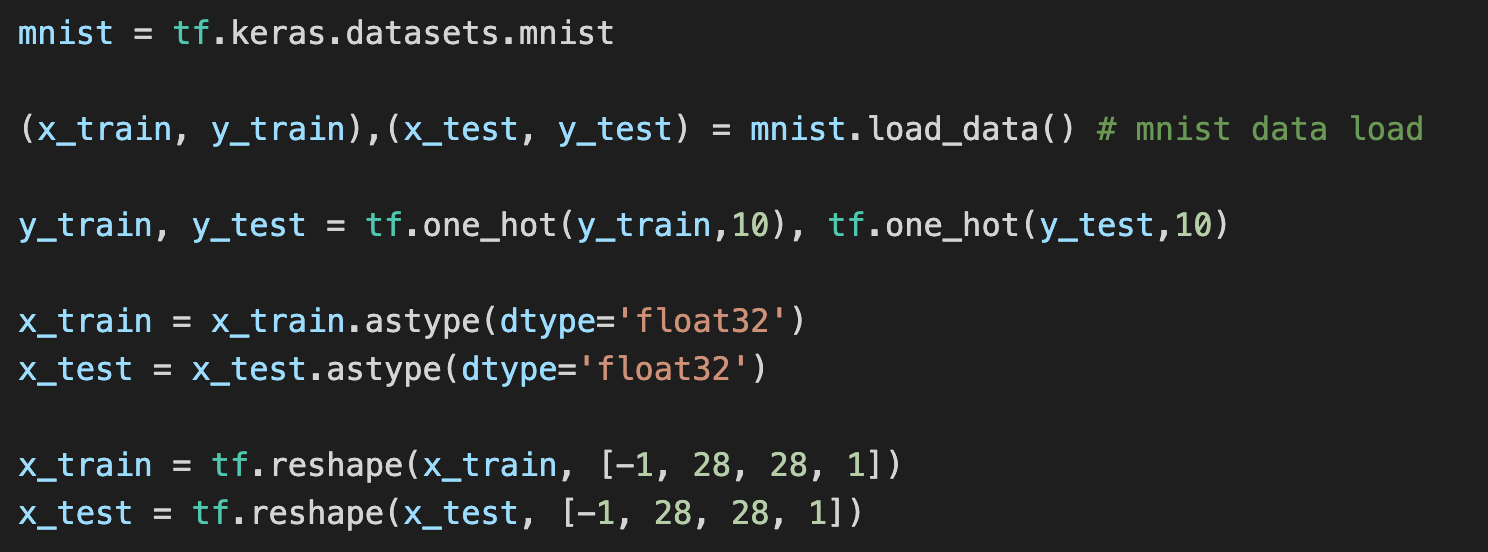

#### Layer1 설정
1. W1, b1: 32개의 3 x 3 x 1의 filter 사용, filter의 개수 32개 즉 bias도 32, filter, bias의 초기값을 난수로 생성 정규분포의 표준편차사용(stddev)
2. convolution 연산: x_train에서 W1 convolution, stride는 각 차원별로 1씩 이동, padding은 같게
3. convolution 연산한 변수에 Relu activation 사용
4. pooling layer는 maxpool 사용, 14 X 14 X 32 사이즈의 output
5. dropout은 rate 변수에 의해 유지할 노드 설정

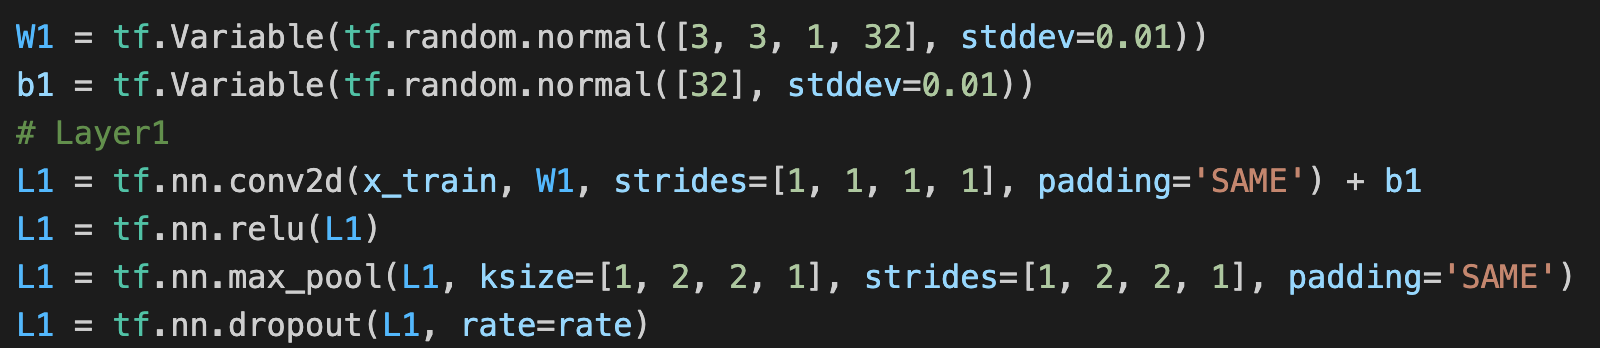

#### Layer2 설정
1. W2, b2: 이전 과정 filter의 개수가 32개였으므로 W2 filter depth도 32, filter 개수는 32, bias도 마찬가지로 32
2. convolution 연산: 이전과정 출력 L1에 filter W2 convolution strid, padding은 이전 과정과 동일
3. 마찬가지로 Relu와 pooling 추가, dropout 추가
4. 7 x 7 x 32 사이즈의 output

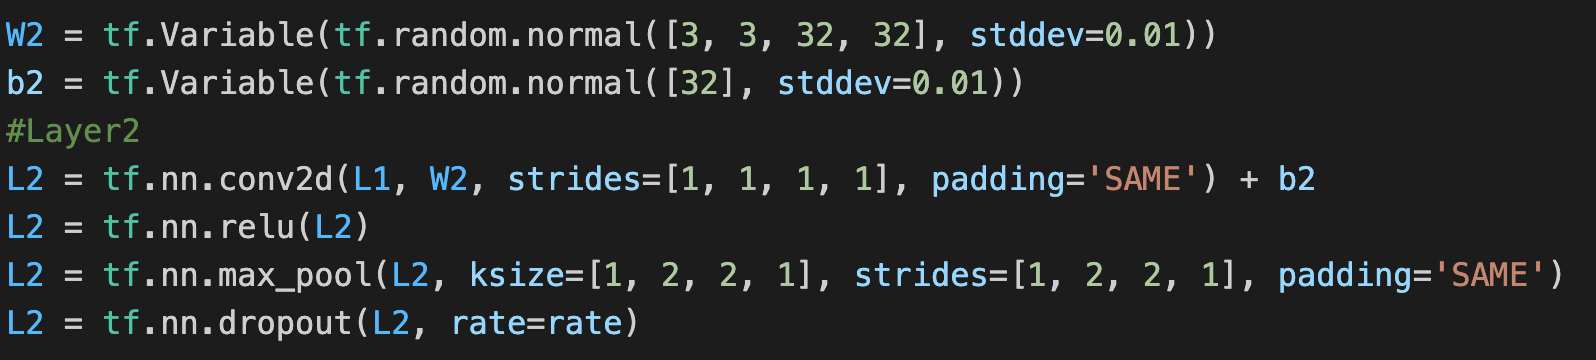

#### Layer3 설정
1. W3,b3: 이전 과정 filter의 개수가 32개였으므로 W3 filter depth도 32, filter 개수는 32, bias도 마찬가지로 32
2. convolution 연산: 이전과정 출력 L2 필터 W3 convolution, stride, padding은 이전과정과 동일
3. 마찬가지로 Relu와 pooling 추가, dropout 추가
4. 4 x 4 x 32 사이즈의 output

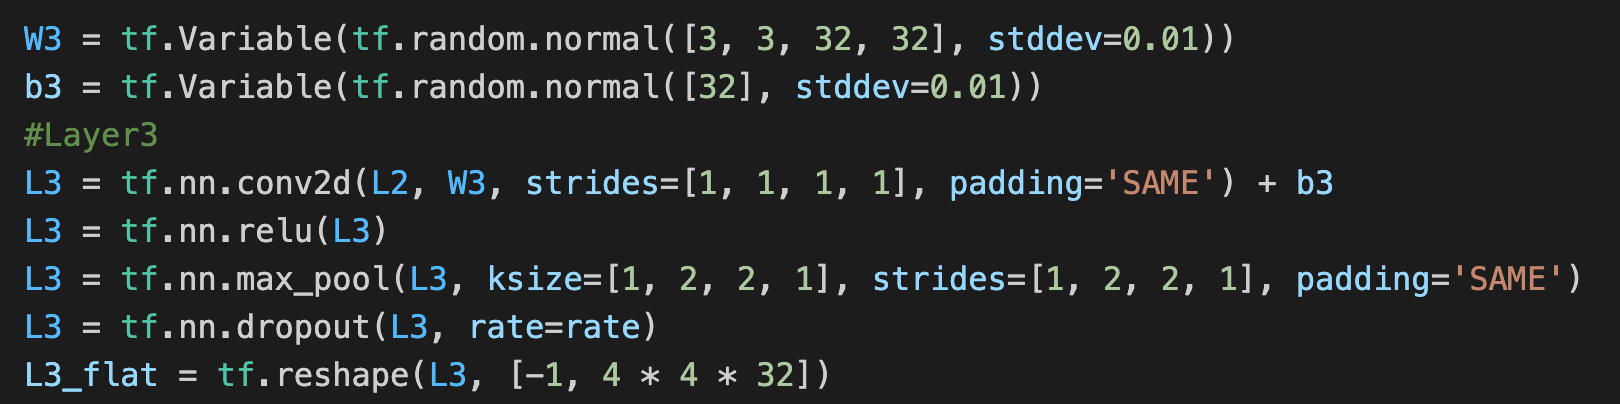

#### Layer4 설정 - fully connected layer
1. W4,b4: 기존의 DNN에서의 weight와 bias, W4 설정에 Xavier initializing을 통해 초기화
2. DNN에서 많이 사용하였던 matmul에 Relu 적용시킨 형태
3. Dropout 적용
4. 4 x 4 x 32 개의 입력 -> 32개의 출력

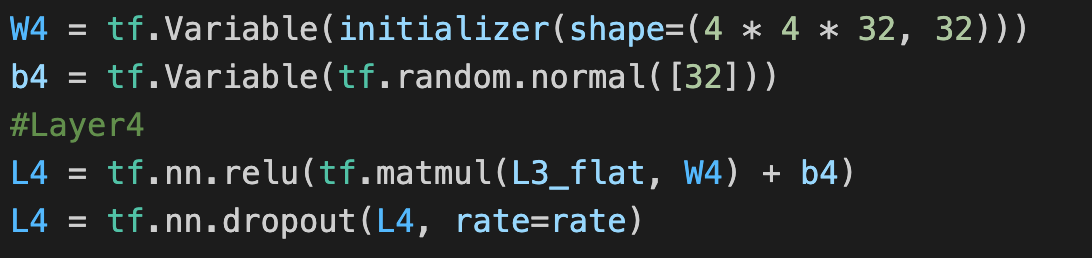

#### Layer5 - fully connected layer
1. W5, b5: 기존의 DNN에서의 weight와 bias, W5 설정에 Xavier initializing을 통해 초기화 
2. 32개의 입력 -> 10개의 출력(0~9까지의 레이블)

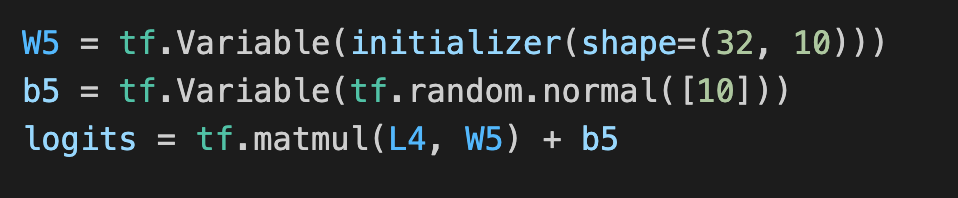

#### cost/loss function 구현
- Softmax-cross-entropy 사용
- 예측값과 실제값 사이의 확률분포 차이 계산

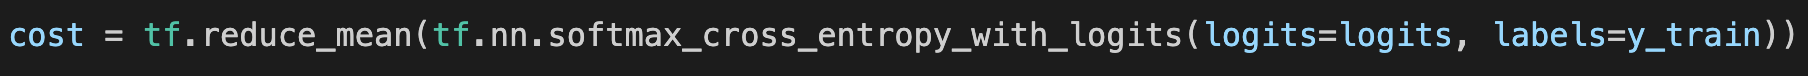

#### 학습 방법 -> cost를 최소화
- 딥러닝 Optimizer 중 가장 성능이 좋은 것으로 평가되는 Adam Optimizer를 사용한다


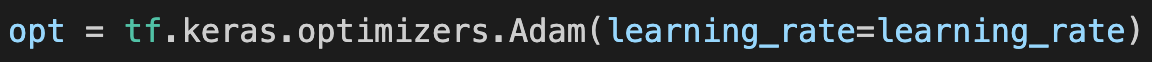

#### 모델 실행

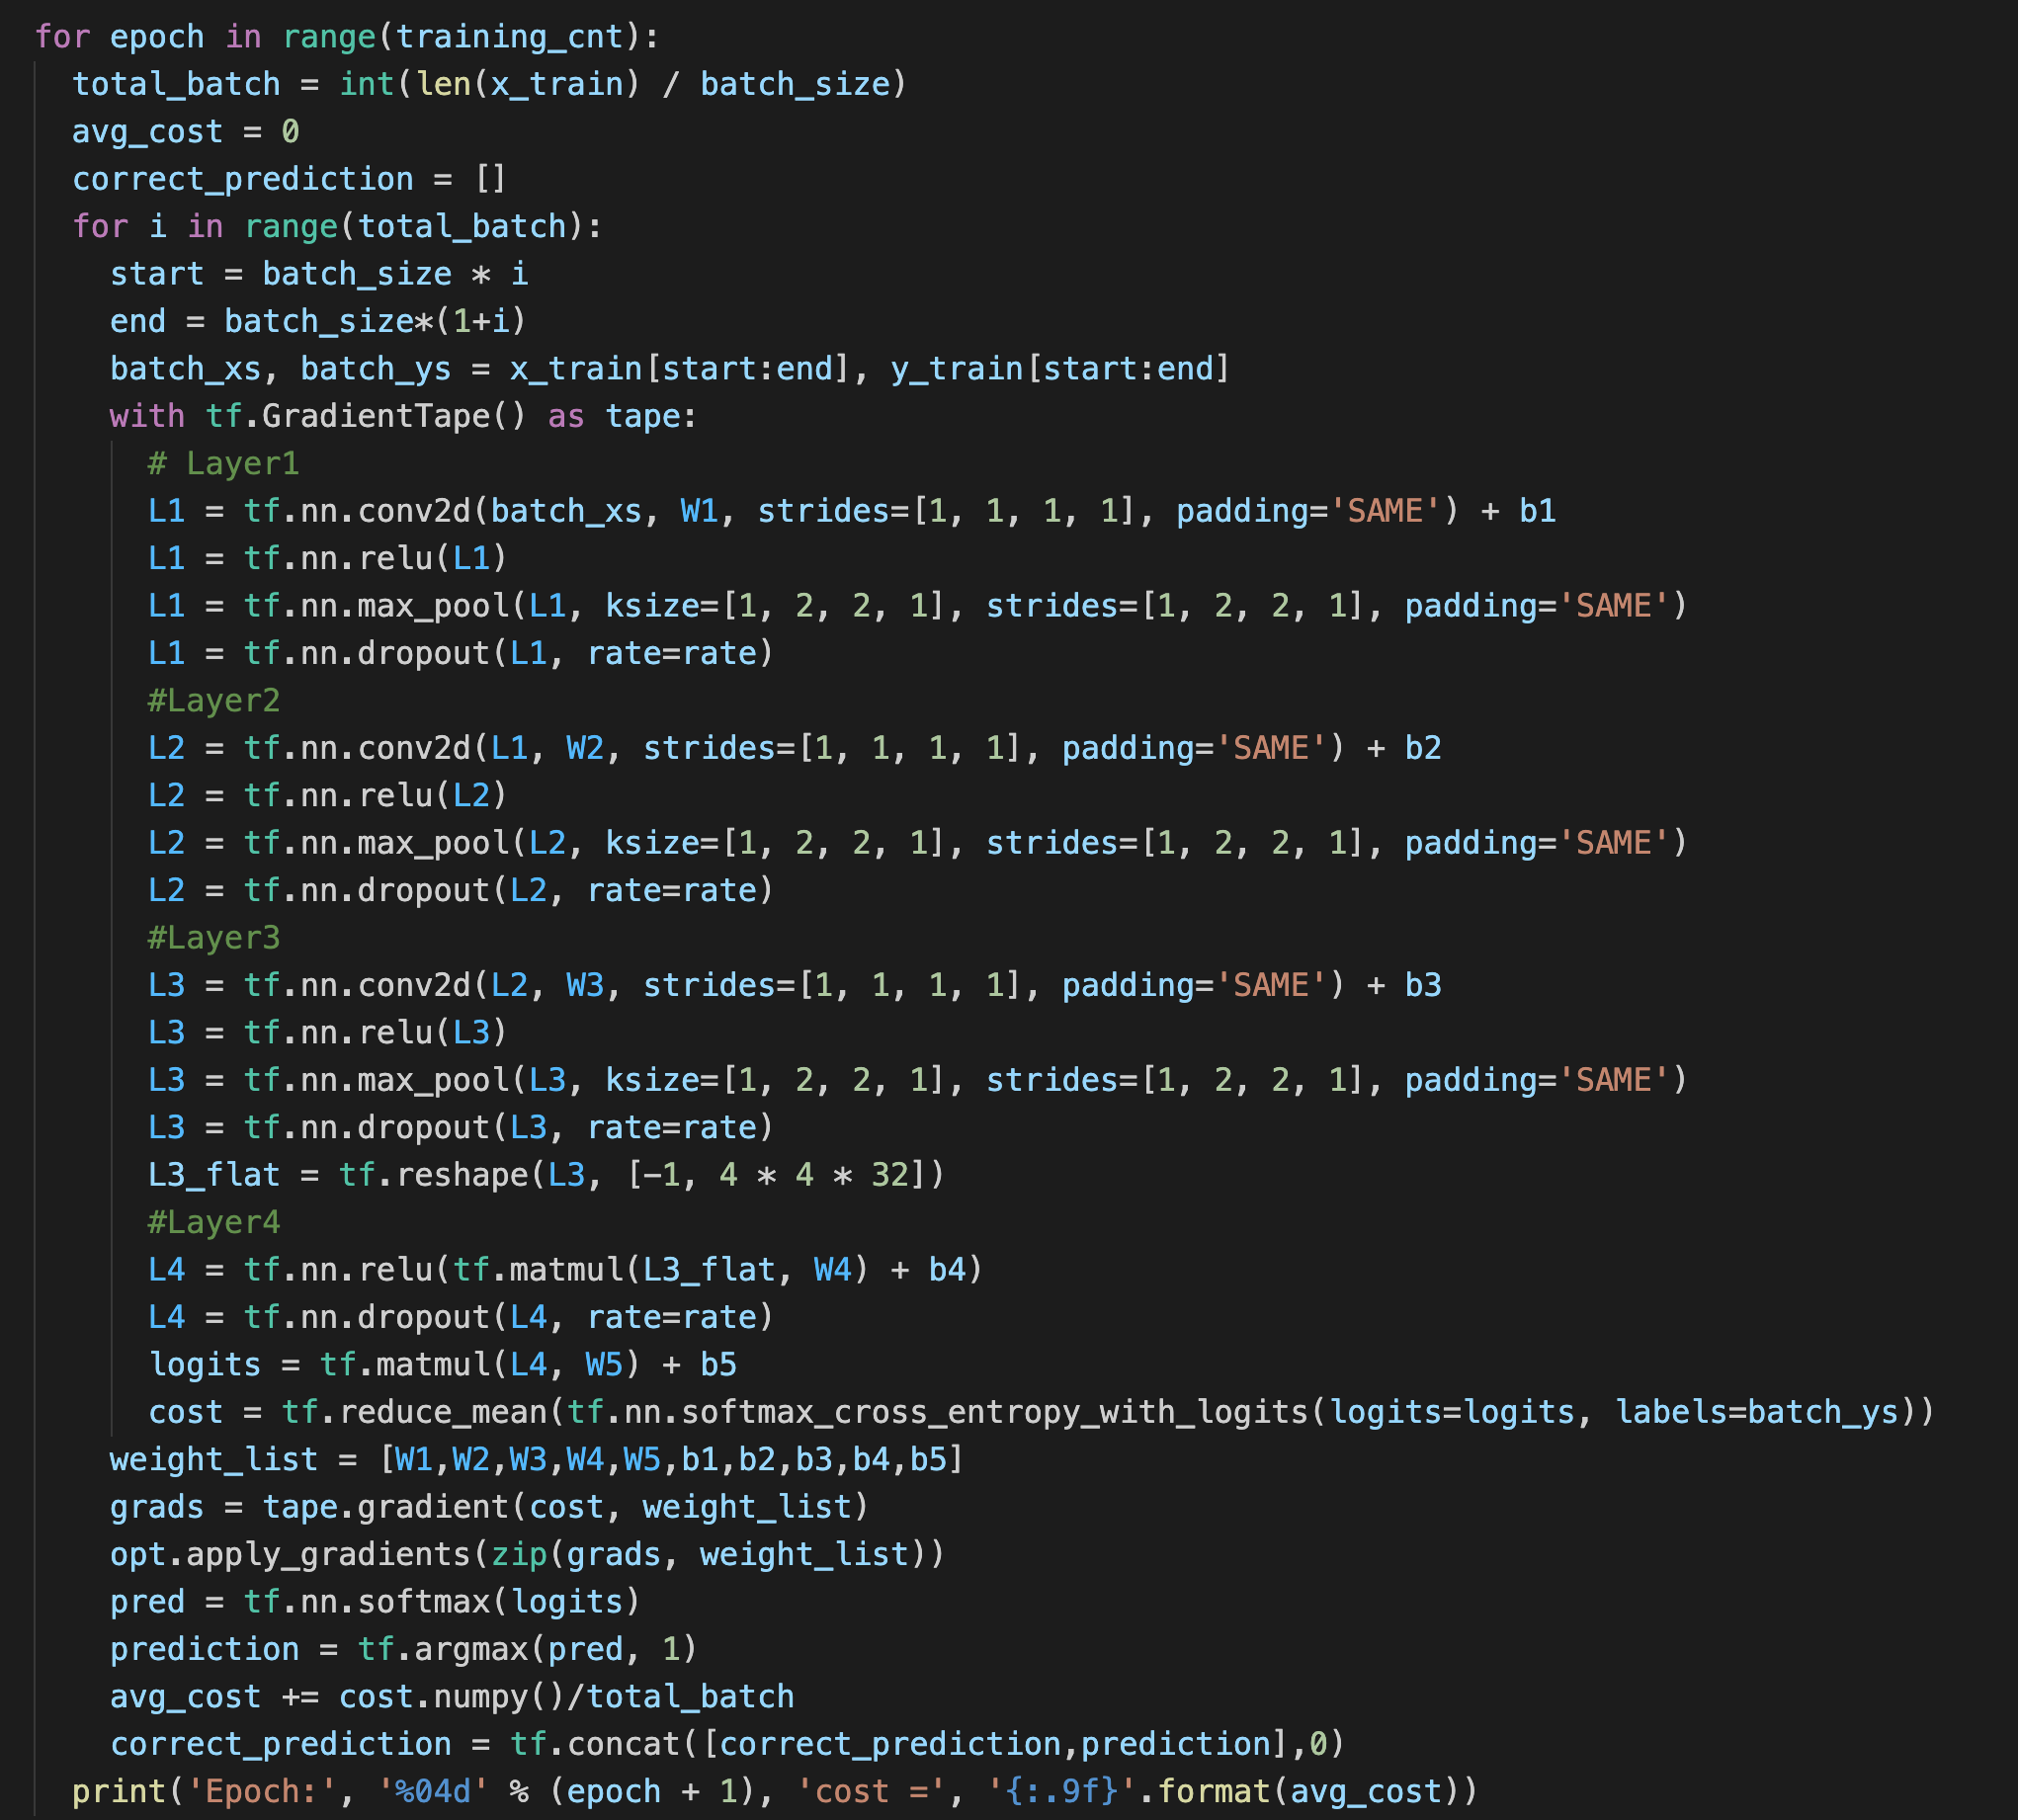

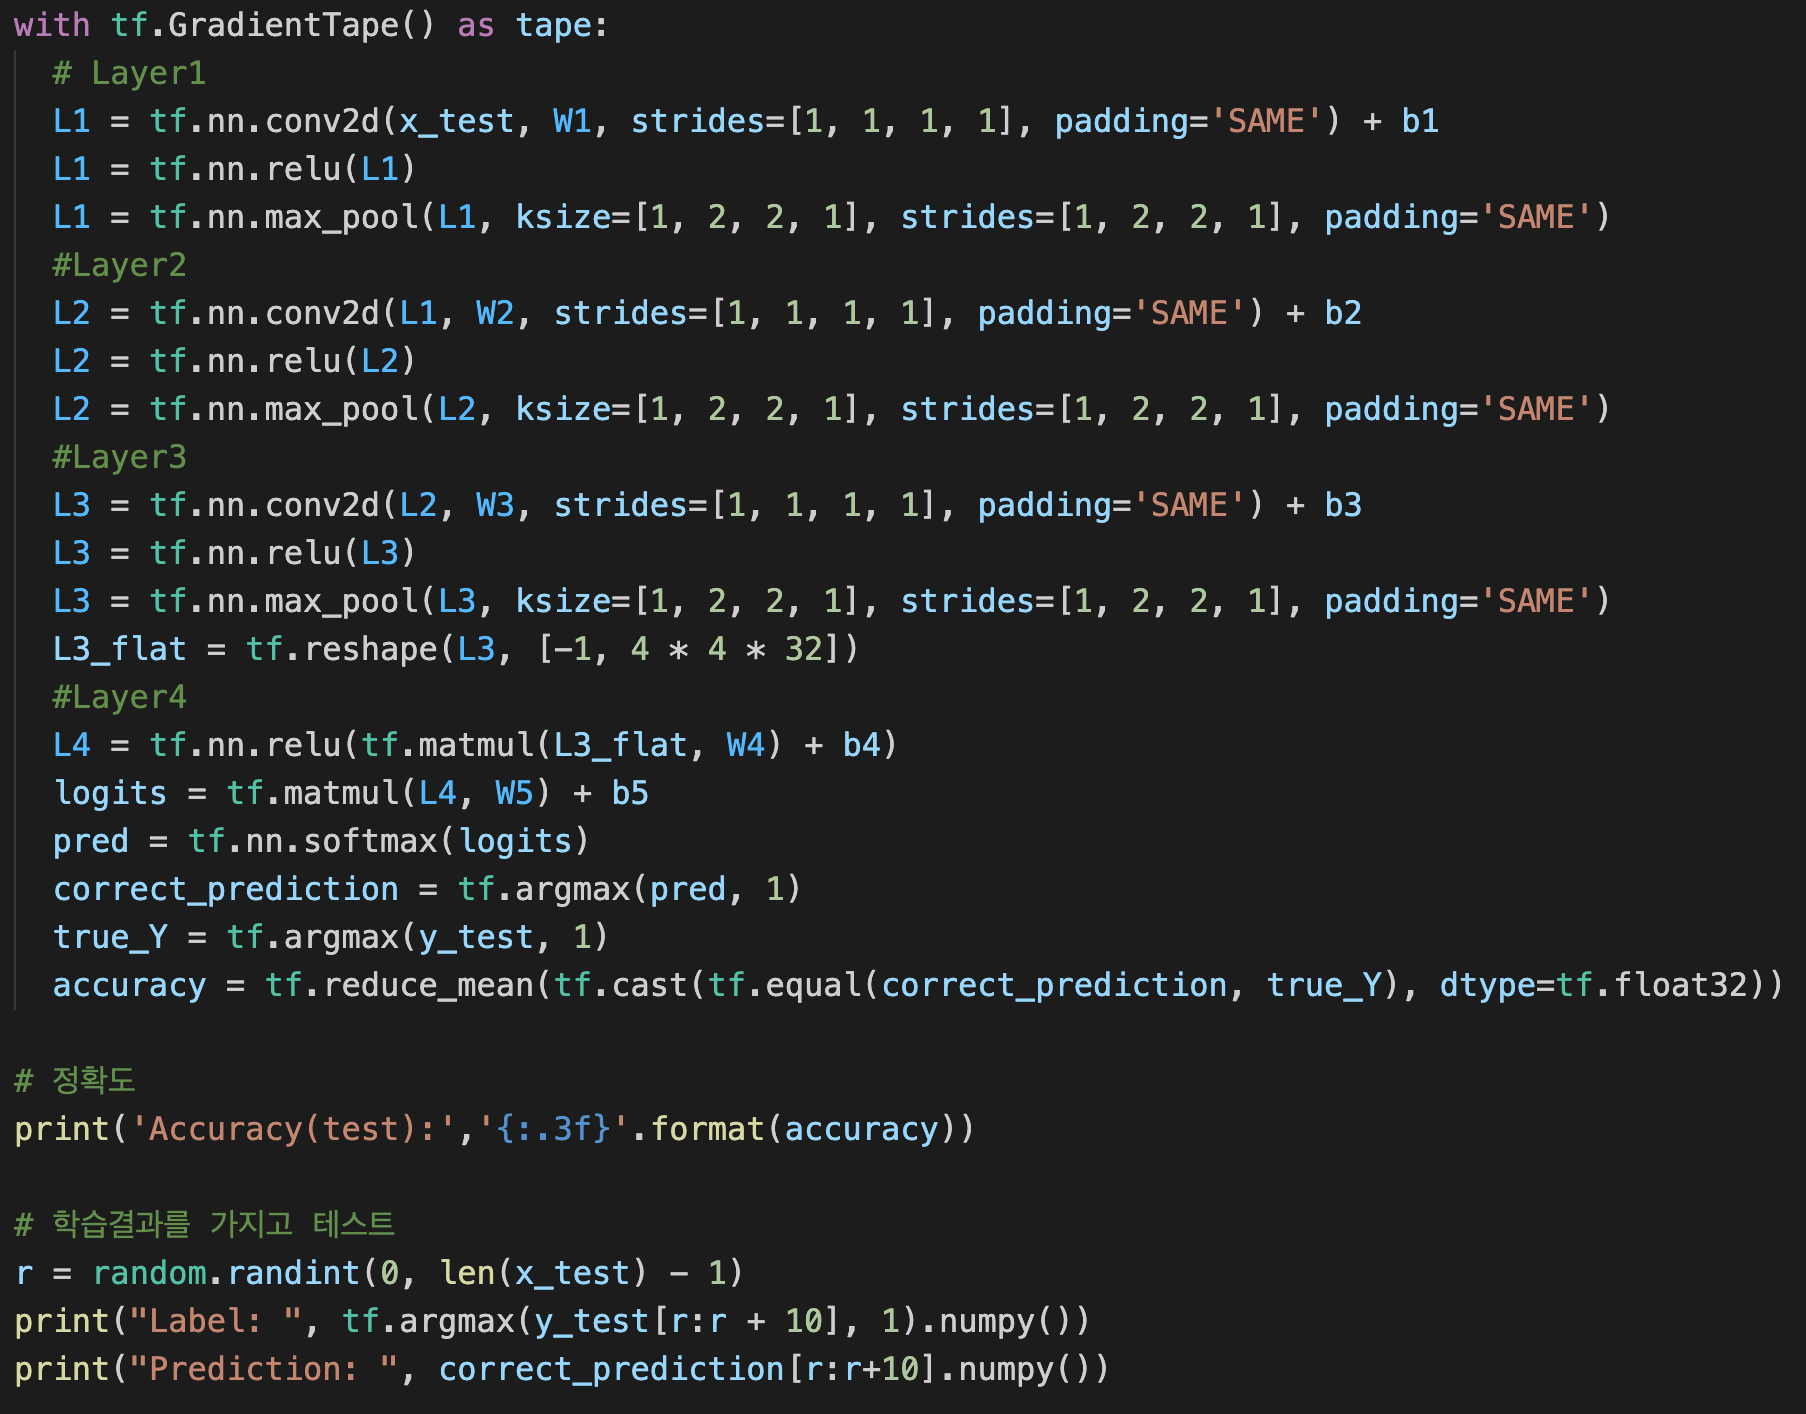

### Batch Normalization 적용

### 4. 전체 학습코드 (learning_rate: 0.001)

In [1]:
import tensorflow as tf
import random
import datetime

learning_rate = 0.001
training_cnt = 2
batch_size = 100

tf.random.set_seed(777)

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data() # mnist data load

y_train, y_test = tf.one_hot(y_train,10), tf.one_hot(y_test,10) 

x_train = x_train.astype(dtype='float32')
x_test = x_test.astype(dtype='float32')

x_train = tf.reshape(x_train, [-1, 28, 28, 1])  
x_test = tf.reshape(x_test, [-1, 28, 28, 1]) 

initializer = tf.initializers.GlorotUniform()

W1 = tf.Variable(tf.random.normal([3, 3, 1, 32], stddev=0.01))
b1 = tf.Variable(tf.random.normal([32], stddev=0.01))

W2 = tf.Variable(tf.random.normal([3, 3, 32, 32], stddev=0.01))
b2 = tf.Variable(tf.random.normal([32], stddev=0.01))

W3 = tf.Variable(tf.random.normal([3, 3, 32, 32], stddev=0.01))
b3 = tf.Variable(tf.random.normal([32], stddev=0.01))

W4 = tf.Variable(initializer(shape=(4 * 4 * 32, 32)))
b4 = tf.Variable(tf.random.normal([32]))

W5 = tf.Variable(initializer(shape=(32, 10)))
b5 = tf.Variable(tf.random.normal([10]))

opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

start_time = datetime.datetime.now();
print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'),'학습을시작합니다!')

for epoch in range(training_cnt):
  total_batch = int(len(x_train) / batch_size)
  avg_cost = 0
  correct_prediction = []
  for i in range(total_batch): 
    start = batch_size * i
    end = batch_size*(1+i)
    batch_xs, batch_ys = x_train[start:end], y_train[start:end]
    with tf.GradientTape() as tape:
      # Layer1
      L1 = tf.nn.conv2d(batch_xs, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
      L1 = tf.keras.layers.BatchNormalization()(L1)
      L1 = tf.nn.relu(L1)
      L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      #Layer2
      L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
      L2 = tf.keras.layers.BatchNormalization()(L2)
      L2 = tf.nn.relu(L2)
      L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      #Layer3
      L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
      L3 = tf.keras.layers.BatchNormalization()(L3)
      L3 = tf.nn.relu(L3)
      L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])
      #Layer4
      L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
      L4 = tf.keras.layers.BatchNormalization()(L4)
      L4 = tf.nn.relu(L4)
      logits = tf.matmul(L4, W5) + b5
      cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=batch_ys))
    weight_list = [W1,W2,W3,W4,W5,b1,b2,b3,b4,b5]
    grads = tape.gradient(cost, weight_list)
    opt.apply_gradients(zip(grads, weight_list))
    pred = tf.nn.softmax(logits)
    prediction = tf.argmax(pred, 1)
    avg_cost += cost.numpy() / total_batch
    correct_prediction = tf.concat([correct_prediction,prediction],0)
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
   
true_Y = tf.argmax(y_train, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_prediction, true_Y), dtype=tf.float32))
print('Accuracy(train):','{:.3f}'.format(accuracy))


print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'), '학습완료!')
print('총학습시간 : ', datetime.datetime.now() - start_time )

with tf.GradientTape() as tape:
  # Layer1
  L1 = tf.nn.conv2d(x_test, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
  L1 = tf.keras.layers.BatchNormalization()(L1)
  L1 = tf.nn.relu(L1)
  L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  #Layer2
  L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
  L2 = tf.keras.layers.BatchNormalization()(L2)
  L2 = tf.nn.relu(L2)
  L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  #Layer3
  L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
  L3 = tf.keras.layers.BatchNormalization()(L3)
  L3 = tf.nn.relu(L3)
  L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])
  #Layer4
  L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
  L4 = tf.keras.layers.BatchNormalization()(L4)
  L4 = tf.nn.relu(L4)
  logits = tf.matmul(L4, W5) + b5
  pred = tf.nn.softmax(logits)
  correct_prediction = tf.argmax(pred, 1)

true_Y = tf.argmax(y_test, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_prediction, true_Y), dtype=tf.float32))
print('Accuracy(test):','{:.3f}'.format(accuracy))

r = random.randint(0, len(x_test) - 1)
print("Label: ", tf.argmax(y_test[r:r + 10], 1).numpy())
print("Prediction: ", correct_prediction[r:r+10].numpy())

11501568/11490434 [==============================] - 0s 0us/step
12-10-2022 06:58:36 학습을시작합니다!
Epoch: 0001 cost = 0.218164829
Epoch: 0002 cost = 0.059767356
Accuracy(train): 0.981
12-10-2022 06:59:32 학습완료!
총학습시간 :  0:00:56.437950
Accuracy(test): 0.987
Label:  [7 8 1 0 0 6 7 7 8 7]
Prediction:  [7 8 1 0 0 6 7 7 8 7]


### 5. 전체 학습코드 (learning_rate: 0.005)

In [2]:
import tensorflow as tf
import random
import datetime

learning_rate = 0.005
training_cnt = 2
batch_size = 100

tf.random.set_seed(777)

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data() # mnist data load

y_train, y_test = tf.one_hot(y_train,10), tf.one_hot(y_test,10) 

x_train = x_train.astype(dtype='float32')
x_test = x_test.astype(dtype='float32')

x_train = tf.reshape(x_train, [-1, 28, 28, 1])  
x_test = tf.reshape(x_test, [-1, 28, 28, 1]) 

initializer = tf.initializers.GlorotUniform()

W1 = tf.Variable(tf.random.normal([3, 3, 1, 32], stddev=0.01))
b1 = tf.Variable(tf.random.normal([32], stddev=0.01))

W2 = tf.Variable(tf.random.normal([3, 3, 32, 32], stddev=0.01))
b2 = tf.Variable(tf.random.normal([32], stddev=0.01))

W3 = tf.Variable(tf.random.normal([3, 3, 32, 32], stddev=0.01))
b3 = tf.Variable(tf.random.normal([32], stddev=0.01))

W4 = tf.Variable(initializer(shape=(4 * 4 * 32, 32)))
b4 = tf.Variable(tf.random.normal([32]))

W5 = tf.Variable(initializer(shape=(32, 10)))
b5 = tf.Variable(tf.random.normal([10]))

opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

start_time = datetime.datetime.now();
print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'),'학습을시작합니다!')

for epoch in range(training_cnt):
  total_batch = int(len(x_train) / batch_size)
  avg_cost = 0
  correct_prediction = []
  for i in range(total_batch): 
    start = batch_size * i
    end = batch_size*(1+i)
    batch_xs, batch_ys = x_train[start:end], y_train[start:end]
    with tf.GradientTape() as tape:
      # Layer1
      L1 = tf.nn.conv2d(batch_xs, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
      L1 = tf.keras.layers.BatchNormalization()(L1)
      L1 = tf.nn.relu(L1)
      L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      #Layer2
      L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
      L2 = tf.keras.layers.BatchNormalization()(L2)
      L2 = tf.nn.relu(L2)
      L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      #Layer3
      L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
      L3 = tf.keras.layers.BatchNormalization()(L3)
      L3 = tf.nn.relu(L3)
      L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
      L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])
      #Layer4
      L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
      L4 = tf.keras.layers.BatchNormalization()(L4)
      L4 = tf.nn.relu(L4)
      logits = tf.matmul(L4, W5) + b5
      cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=batch_ys))
    weight_list = [W1,W2,W3,W4,W5,b1,b2,b3,b4,b5]
    grads = tape.gradient(cost, weight_list)
    opt.apply_gradients(zip(grads, weight_list))
    pred = tf.nn.softmax(logits)
    prediction = tf.argmax(pred, 1)
    avg_cost += cost.numpy() / total_batch
    correct_prediction = tf.concat([correct_prediction,prediction],0)
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
   
true_Y = tf.argmax(y_train, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_prediction, true_Y), dtype=tf.float32))
print('Accuracy(train):','{:.3f}'.format(accuracy))


print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'), '학습완료!')
print('총학습시간 : ', datetime.datetime.now() - start_time )

with tf.GradientTape() as tape:
  # Layer1
  L1 = tf.nn.conv2d(x_test, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
  L1 = tf.keras.layers.BatchNormalization()(L1)
  L1 = tf.nn.relu(L1)
  L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  #Layer2
  L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
  L2 = tf.keras.layers.BatchNormalization()(L2)
  L2 = tf.nn.relu(L2)
  L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  #Layer3
  L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
  L3 = tf.keras.layers.BatchNormalization()(L3)
  L3 = tf.nn.relu(L3)
  L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])
  #Layer4
  L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
  L4 = tf.keras.layers.BatchNormalization()(L4)
  L4 = tf.nn.relu(L4)
  logits = tf.matmul(L4, W5) + b5
  pred = tf.nn.softmax(logits)
  correct_prediction = tf.argmax(pred, 1)

true_Y = tf.argmax(y_test, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_prediction, true_Y), dtype=tf.float32))
print('Accuracy(test):','{:.3f}'.format(accuracy))

r = random.randint(0, len(x_test) - 1)
print("Label: ", tf.argmax(y_test[r:r + 10], 1).numpy())
print("Prediction: ", correct_prediction[r:r+10].numpy())

12-10-2022 07:01:06 학습을시작합니다!
Epoch: 0001 cost = 0.256355507
Epoch: 0002 cost = 0.096821347
Accuracy(train): 0.971
12-10-2022 07:01:43 학습완료!
총학습시간 :  0:00:37.004531
Accuracy(test): 0.953
Label:  [2 8 3 2 2 1 0 4 2 9]
Prediction:  [2 8 3 2 2 1 0 4 2 9]


### 6. 학습과정 설명

#### 파라메터 값 설정
- traing_cnt: 전체 데이터셋에 대한 학습 반복 횟수(Epoch)는 2번으로 줄여도 이전 CNN학습과 비슷한 결과를 볼 수 있다
- dropout 효과를 볼 수 있기 때문에 dropout 변수 및 arg 삭제

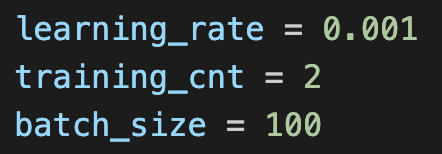

#### Layer 1,2,3,4 Batch Normalization 추가
- 합성곱과 FC 연산 Layer의 값들을 활성화함수로 넘겨 주기 전에 정규화 한다
- Layer 2,3,4도 활성화함수 relu 적용 전 추가해주면 된다

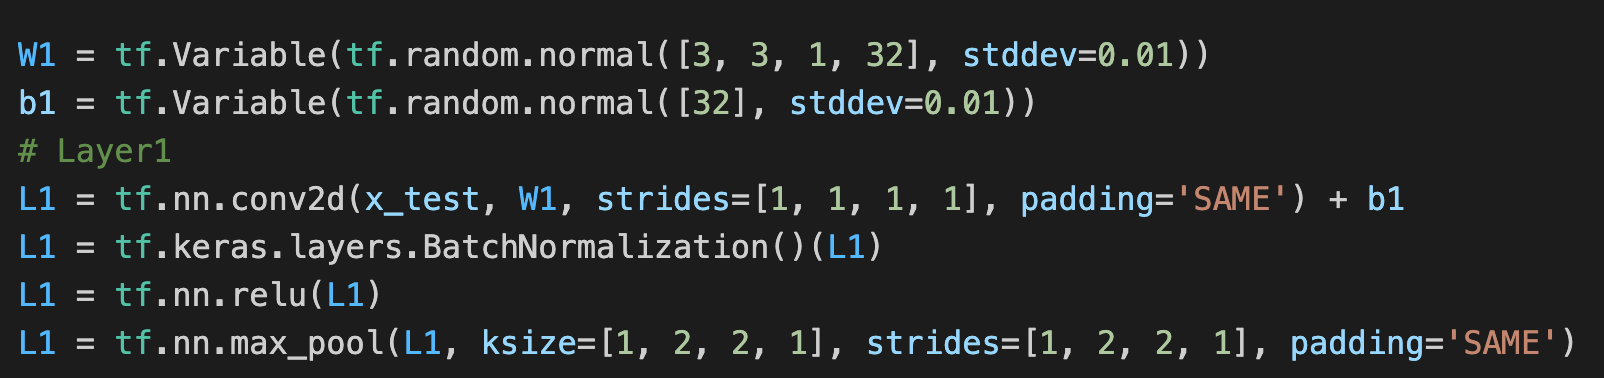
